# 使用最小二乘法拟合曲线


In [175]:
import numpy as np 
import scipy as sp 
from scipy.optimize import leastsq  #最小二乘
import matplotlib.pyplot as plt
%matplotlib inline

ps:numpy.poly1d([1,2,3])生成多项式\$$1x^2+2x^1+3x^0$$

In [176]:
#目标函数：正弦曲线
def real_func(x):
    return np.sin(2*np.pi*x)

In [177]:
#拟合函数：多项式
def fit_func(p,x):
    f=np.poly1d(p)
    return f(x)

In [178]:
#残差
def residuals_func(p,x,y):
    ret=fit_func(p,x)-y
    return ret

In [179]:
#十个点
x=np.linspace(0,1,10)
x_points=np.linspace(0,1,1000)
#对目标函数加高斯噪声
y_=real_func(x)
y=[np.random.normal(0,0.1)+y1 for y1 in y_]

#拟合
def fitting(M=0):
    """
    M为多项式的阶数

    """
    #随机初始化参数
    p_init=np.random.rand(M+1)
    #最小二乘
    p_lsq=leastsq(residuals_func,p_init,args=(x,y))  #第一个参数为最小化目标，第三个为第一个指定x,y之间
    print("Fitting Parameters:",p_lsq[0])
    
    #可视化
    plt.plot(x_points,real_func(x_points),label="real")
    plt.plot(x_points,fit_func(p_lsq[0],x_points),label="fitted curve")
    plt.plot(x,y,"bo",label="noise")
    plt.legend()
    return p_lsq


Fitting Parameters: [0.00903515]


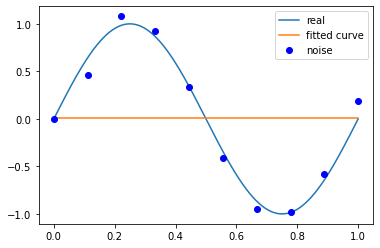

In [180]:
#M=0
p_lsq_0=fitting(M=0)

Fitting Parameters: [-1.21444052  0.61625541]


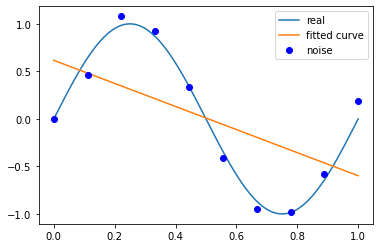

In [181]:
#M=1
p_lsq_1=fitting(M=1)

Fitting Parameters: [ 22.83671636 -33.90133734  11.42901518  -0.12075644]


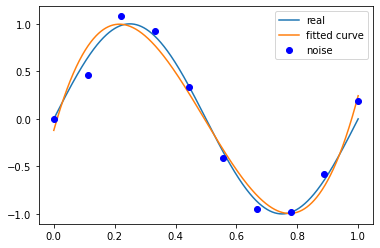

In [182]:
#M=3
p_lsq_0=fitting(M=3)

Fitting Parameters: [-7.34129192e+02  4.59758102e+03 -1.15960763e+04  1.56298423e+04
 -1.24793723e+04  6.13600287e+03 -1.81939302e+03  2.76592733e+02
 -1.08629635e+01  1.98653696e-03]


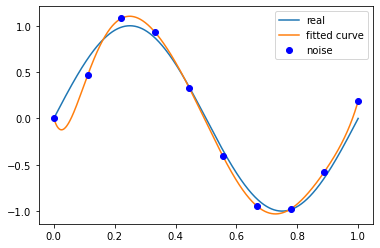

In [183]:
#M=9
p_lsq_0=fitting(M=9)

Fitting Parameters: [-8.62610428e+01  2.18271086e+02 -1.70541610e+02  3.59231254e+01
  2.79753518e+00 -1.58651636e-02]


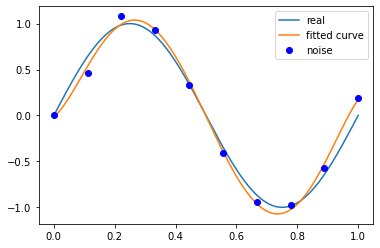

In [184]:
#M=5
p_lsq_0=fitting(M=5)

In [188]:
#方差+正则化
c=0.001 #正则化系数

#L2正则化
def residuals_func_regularization_L2(p,x,y):
    ret=fit_func(p,x)-y
    #ret=np.append(ret,0.5*c*np.square(p))
    ret=np.append(ret,c*np.sqrt(0.5*c*np.square(p)))
   # ret=np.append(ret,np.abs(p))
    return ret

#L1正则化
def residuals_func_regularization_L1(p,x,y):
    ret=np.abs(fit_func(p,x)-y)
    ret=np.append(ret,c*np.abs(p))
    return ret

In [189]:
#最小二乘法+正则化
def fitting(M=9):
    """
    M为多项式的阶数

    """
    #随机初始化参数
    p_init=np.random.rand(M+1)
    #最小二乘
    p_lsq1=leastsq(residuals_func,p_init,args=(x,y))  #未正则化
    p_lsq2=leastsq(residuals_func_regularization_L2,p_init,args=(x,y))  #第一个参数为最小化目标，第三个为第一个指定x,y之间
    p_lsq3=leastsq(residuals_func_regularization_L1,p_init,args=(x,y))
    print("Fitting Parameters:",p_lsq1[0])
    print("L2-regularization Fitting Parameters:",p_lsq2[0])
    print("L1-regularization Fitting Parameters:",p_lsq3[0])
    
    #可视化
    plt.plot(x_points,real_func(x_points),label="real")
    plt.plot(x_points,fit_func(p_lsq1[0],x_points),label="fitted curve")
    plt.plot(x_points,fit_func(p_lsq2[0],x_points),label="fitted curve nor_L2")
    plt.plot(x_points,fit_func(p_lsq3[0],x_points),label="fitted curve nor_L1")
    plt.plot(x,y,"bo",label="noise")
    plt.title("Regularization")
    plt.legend()
    return p_lsq1


Fitting Parameters: [-7.34129192e+02  4.59758102e+03 -1.15960763e+04  1.56298423e+04
 -1.24793723e+04  6.13600287e+03 -1.81939302e+03  2.76592733e+02
 -1.08629635e+01  1.98653696e-03]
L2-regularization Fitting Parameters: [ 2.71772908e+01 -1.81296605e+02  3.49436702e+02 -9.19069635e+01
 -5.37583547e+02  7.99537994e+02 -4.63809769e+02  1.00841493e+02
 -2.20992969e+00  5.68342880e-05]
L1-regularization Fitting Parameters: [ 3.18381143e+01 -3.38236945e+01 -4.02944373e+01  3.99017808e+00
  5.84133719e+01  4.26663195e+01 -8.26565294e+01  1.54495513e+01
  4.63204968e+00 -3.11934898e-02]


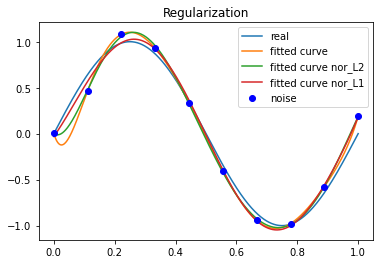

In [190]:
p_lsq_0=fitting(M=9)